****************CLASSIC TITANIC: MACHINE LEARNING FROM DISASTER (WITH PYTHON)***************


In [54]:
%matplotlib inline

import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [56]:
type(train)

pandas.core.frame.DataFrame

In [57]:
type(test)

pandas.core.frame.DataFrame

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [61]:
test.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [247]:
train_1 = train.drop(['PassengerId','Name','Ticket'], axis=1)
test_1 = test.drop(['Name','Ticket'], axis=1)

In [85]:
train_1.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [248]:
test_1.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q


In [87]:
train_1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [88]:
 train_1['Survived'].isnull().sum()

0

In [89]:
 train_1['Pclass'].isnull().sum()

0

In [90]:
 train_1['Sex'].isnull().sum()

0

In [69]:
 train_1['Age'].isnull().sum()

177

In [91]:
 train_1['SibSp'].isnull().sum()

0

In [92]:
 train_1['Parch'].isnull().sum()

0

In [93]:
 train_1['Fare'].isnull().sum()

0

In [94]:
 train_1['Embarked'].isnull().sum()

2

In [95]:
 train_1['Cabin'].isnull().sum()

687

In [96]:
train_1['Age'].fillna(value=train_1['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [97]:
 train_1['Age'].isnull().sum()

177

In [98]:
 train_1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
train_1['Embarked']=train_1['Embarked'].fillna("S")

In [100]:
train_1['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [101]:
 train_1['Age']= train_1['Age'].fillna(value=train_1['Age'].mean())

In [102]:
 train_1['Age'].isnull().sum()

0

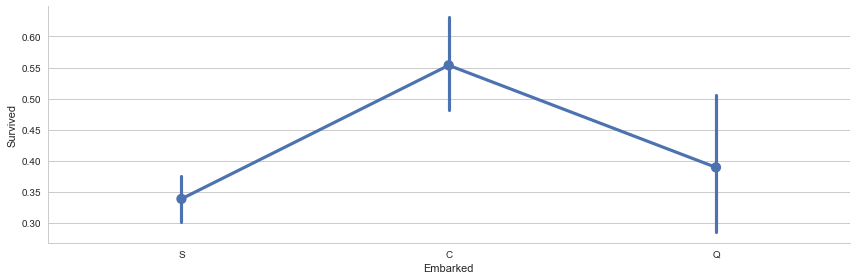

In [105]:
sns.factorplot('Embarked','Survived', data=train_1,size=4,aspect=3)

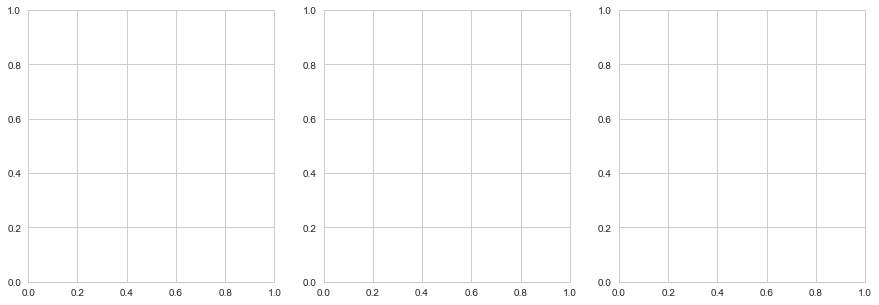

In [106]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

In [249]:
test_1.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [250]:
test_1['Pclass'].isnull().sum()

0

In [251]:
test_1['Sex'].isnull().sum()

0

In [252]:
test_1['Age'].isnull().sum()

86

In [253]:
test_1['Age']= test_1['Age'].fillna(value=test_1['Age'].mean())

In [254]:
test_1['Age'].isnull().sum()

0

In [255]:
test_1['SibSp'].isnull().sum()

0

In [256]:
test_1['Parch'].isnull().sum()

0

In [257]:
test_1['Fare'].isnull().sum()

1

In [258]:
test_1['Fare']= test_1['Fare'].fillna(value=test_1['Fare'].mean())

In [259]:
test_1['Fare'].isnull().sum()

0

In [260]:
train_2 = train_1.drop(['Cabin'], axis=1)
test_2 = test_1.drop(['Cabin'], axis=1)


In [119]:
train_2.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [261]:
test_2.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [262]:
test_2['Pclass'].isnull().sum()

0

In [122]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [123]:
print(__version__)

2.0.10


In [124]:
import cufflinks as cf

In [125]:
# For Notebooks
init_notebook_mode(connected=True)

In [126]:
# For offline use
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [127]:
train_2.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [263]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [129]:
train_2['Fare'] = train_2['Fare'].astype(int)

In [264]:
test_2['Fare'] = test_2['Fare'].astype(int)

In [265]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
Embarked       418 non-null object
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 24.6+ KB


In [266]:
train_3 = train_2.drop(['Embarked'], axis=1)
test_3 = test_2.drop(['Embarked'], axis=1)

In [134]:
train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 45.3+ KB


In [267]:
test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 21.3+ KB


In [268]:
train_3['Family'] =  train_3["Parch"] + train_3["SibSp"]
train_3['Family'].loc[train_3['Family'] > 0] = 1
train_3['Family'].loc[train_3['Family'] == 0] = 0

test_3['Family'] =  test_3["Parch"] + test_3["SibSp"]
test_3['Family'].loc[test_3['Family'] > 0] = 1
test_3['Family'].loc[test_3['Family'] == 0] = 0

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [269]:
test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
Family         418 non-null int64
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 24.6+ KB


In [270]:
train_3 = train_3.drop(['SibSp'], axis=1)
train_3 = train_3.drop(['Parch'], axis=1)
test_3 = test_3.drop(['SibSp'], axis=1)
test_3 = test_3.drop(['Parch'], axis=1)

In [139]:
train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null int32
Family      891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 38.4+ KB


In [271]:
test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           418 non-null int32
Family         418 non-null int64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 18.0+ KB


In [141]:
train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null int32
Family      891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 38.4+ KB


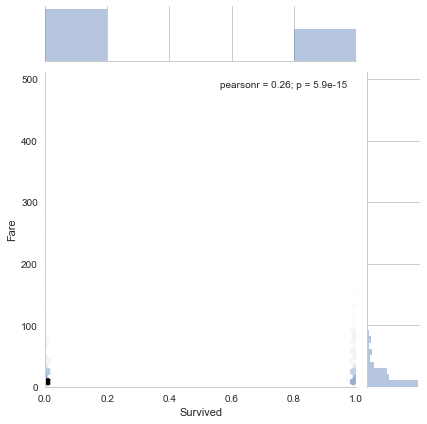

In [142]:
sns.jointplot(y='Fare',x='Survived',data=train_3,kind='hex')
#ns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

In [143]:
train_3.head(150)

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,male,22.000000,7,1
1,1,1,female,38.000000,71,1
2,1,3,female,26.000000,7,0
3,1,1,female,35.000000,53,1
4,0,3,male,35.000000,8,0
5,0,3,male,29.699118,8,0
6,0,1,male,54.000000,51,0
7,0,3,male,2.000000,21,1
8,1,3,female,27.000000,11,1
9,1,2,female,14.000000,30,1


In [144]:
train_3['Fare'].mean()

31.78563411896745

In [145]:
tra=train_3

In [153]:
tr['Imp'] = Series(np.random.randn(len(tr['Age'])), index=tr.index)


In [146]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null int32
Family      891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 38.4+ KB


In [147]:
tra.head(5)

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,male,22.0,7,1
1,1,1,female,38.0,71,1
2,1,3,female,26.0,7,0
3,1,1,female,35.0,53,1
4,0,3,male,35.0,8,0


In [148]:
tra=tra['Sex'].replace({0:'male',1:'female'},inplace=True)

In [150]:
tr=train_3


In [151]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null int32
Family      891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 38.4+ KB


In [154]:
type(tr['Imp'])


pandas.core.series.Series

In [156]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null int32
Family      891 non-null int64
Imp         891 non-null float64
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.3+ KB


In [158]:
tr['Sex']=tr['Sex'].replace(['male'], '0')

In [159]:
tr.head(2)

,Survived,Pclass,Sex,Age,Fare,Family,Imp
0,0,3,0,22.0,7,1,0.081407
1,1,1,female,38.0,71,1,-1.941129


In [160]:
tr.head(10)

,Survived,Pclass,Sex,Age,Fare,Family,Imp
0,0,3,0,22.000000,7,1,0.081407
1,1,1,female,38.000000,71,1,-1.941129
2,1,3,female,26.000000,7,0,-0.492245
3,1,1,female,35.000000,53,1,-0.234026
4,0,3,0,35.000000,8,0,1.352609
5,0,3,0,29.699118,8,0,-0.403043
6,0,1,0,54.000000,51,0,-0.215285
7,0,3,0,2.000000,21,1,-0.939830
8,1,3,female,27.000000,11,1,0.454075
9,1,2,female,14.000000,30,1,-0.545819


In [161]:
tr['Sex']=tr['Sex'].replace(['female'], '1')

In [162]:
tr.head(25)

,Survived,Pclass,Sex,Age,Fare,Family,Imp
0,0,3,0,22.000000,7,1,0.081407
1,1,1,1,38.000000,71,1,-1.941129
2,1,3,1,26.000000,7,0,-0.492245
3,1,1,1,35.000000,53,1,-0.234026
4,0,3,0,35.000000,8,0,1.352609
5,0,3,0,29.699118,8,0,-0.403043
6,0,1,0,54.000000,51,0,-0.215285
7,0,3,0,2.000000,21,1,-0.939830
8,1,3,1,27.000000,11,1,0.454075
9,1,2,1,14.000000,30,1,-0.545819


In [163]:
tr['Age']=tr['Age'].astype(int)

In [164]:
tr.head(5)

,Survived,Pclass,Sex,Age,Fare,Family,Imp
0,0,3,0,22,7,1,0.081407
1,1,1,1,38,71,1,-1.941129
2,1,3,1,26,7,0,-0.492245
3,1,1,1,35,53,1,-0.234026
4,0,3,0,35,8,0,1.352609


In [165]:
tr.drop("Imp",axis=1,inplace=True)

In [167]:
tr.head(15)

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,22,7,1
1,1,1,1,38,71,1
2,1,3,1,26,7,0
3,1,1,1,35,53,1
4,0,3,0,35,8,0
5,0,3,0,29,8,0
6,0,1,0,54,51,0
7,0,3,0,2,21,1
8,1,3,1,27,11,1
9,1,2,1,14,30,1


In [198]:
t=tr
type(t)


pandas.core.frame.DataFrame

In [199]:
t.head(2)

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,22,7,1
1,1,1,1,38,71,1


In [222]:
t['Class1']= np.random.randn(len(t['Age']))
t['Class2']= np.random.randn(len(t['Age']))
t['Class3']= np.random.randn(len(t['Age']))
t['Class1']= 0
t['Class2']= 0
t['Class3']= 0

In [223]:
t.head(2)

,Survived,Pclass,Sex,Age,Fare,Family,Class1,Class2,Class3
0,0,3,0,22,7,1,0,0,0
1,1,1,1,38,71,1,0,0,0


In [225]:


t['Class1'][t['Pclass']==1]=1
t['Class2'][t['Pclass']==2]=1
t['Class3'][t['Pclass']==3]=1


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [226]:
t.head(2)


,Survived,Pclass,Sex,Age,Fare,Family,Class1,Class2,Class3
0,0,3,0,22,7,1,0,0,1
1,1,1,1,38,71,1,1,0,0


In [227]:
t.head(10)

,Survived,Pclass,Sex,Age,Fare,Family,Class1,Class2,Class3
0,0,3,0,22,7,1,0,0,1
1,1,1,1,38,71,1,1,0,0
2,1,3,1,26,7,0,0,0,1
3,1,1,1,35,53,1,1,0,0
4,0,3,0,35,8,0,0,0,1
5,0,3,0,29,8,0,0,0,1
6,0,1,0,54,51,0,1,0,0
7,0,3,0,2,21,1,0,0,1
8,1,3,1,27,11,1,0,0,1
9,1,2,1,14,30,1,0,1,0


In [228]:
t = t.drop(['Pclass'], axis=1)

In [229]:
t.head(3)

,Survived,Sex,Age,Fare,Family,Class1,Class2,Class3
0,0,0,22,7,1,0,0,1
1,1,1,38,71,1,1,0,0
2,1,1,26,7,0,0,0,1


In [272]:
test_3.head(3)

,PassengerId,Pclass,Sex,Age,Fare,Family
0,892,3,male,34.5,7,0
1,893,3,female,47.0,7,1
2,894,2,male,62.0,9,0


In [273]:
te=test_3

In [274]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           418 non-null int32
Family         418 non-null int64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 18.0+ KB


In [275]:
te['Class1']= np.random.randn(len(te['Age']))
te['Class2']= np.random.randn(len(te['Age']))
te['Class3']= np.random.randn(len(te['Age']))
te['Class1']= 0
te['Class2']= 0
te['Class3']= 0

In [281]:
te['Sex']=te['Sex'].replace(['female'], '1')
te['Sex']=te['Sex'].replace(['male'], '0')
te['Class1'][te['Pclass']==1]=1
te['Class2'][te['Pclass']==2]=1
te['Class3'][te['Pclass']==3]=1
te = te.drop(['Pclass'], axis=1)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [282]:
te.head(3)

,PassengerId,Sex,Age,Fare,Family,Class1,Class2,Class3
0,892,0,34.5,7,0,0,0,1
1,893,1,47.0,7,1,0,0,1
2,894,0,62.0,9,0,0,1,0


In [277]:
t.head(3)

,Survived,Sex,Age,Fare,Family,Class1,Class2,Class3
0,0,0,22,7,1,0,0,1
1,1,1,38,71,1,1,0,0
2,1,1,26,7,0,0,0,1


In [283]:
X_train = t.drop("Survived",axis=1)
Y_train = t["Survived"]
X_test  = te.drop("PassengerId",axis=1)

In [284]:
X_test.head(5)

,Sex,Age,Fare,Family,Class1,Class2,Class3
0,0,34.5,7,0,0,0,1
1,1,47.0,7,1,0,0,1
2,0,62.0,9,0,0,1,0
3,0,27.0,8,0,0,0,1
4,1,22.0,12,1,0,0,1


In [2]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

NameError: name 'LogisticRegression' is not defined

In [1]:
# Random Forests
Y_pred


NameError: name 'Y_pred' is not defined

In [287]:
submission = pd.DataFrame({
        "PassengerId": te["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanics.csv', index=False)

In [289]:
train_3['S'].value_counts()

KeyError: 'S'